<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/EDGE_Mid_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
heart_data = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
#print firtst 5 rows of the dataset
heart_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#print last 5 rows of the dataset
heart_data.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
46778,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,2.0,0.0,1.0,8.0,6.0,8.0
46779,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,3.0,2.0
46780,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,3.0
46781,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
46782,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#number of rows and column in the dataset
heart_data.shape

(46783, 22)

In [ ]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46783 entries, 0 to 46782
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  46783 non-null  float64
 1   HighBP                46783 non-null  float64
 2   HighChol              46783 non-null  float64
 3   CholCheck             46783 non-null  float64
 4   BMI                   46783 non-null  float64
 5   Smoker                46783 non-null  float64
 6   Stroke                46783 non-null  float64
 7   Diabetes              46783 non-null  float64
 8   PhysActivity          46783 non-null  float64
 9   Fruits                46783 non-null  float64
 10  Veggies               46782 non-null  float64
 11  HvyAlcoholConsump     46782 non-null  float64
 12  AnyHealthcare         46782 non-null  float64
 13  NoDocbcCost           46782 non-null  float64
 14  GenHlth               46782 non-null  float64
 15  MentHlth           

In [ ]:
#checking for missing values
heart_data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 1
HvyAlcoholConsump       1
AnyHealthcare           1
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

In [ ]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are1955 duplicates data


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
7125,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
9414,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
27973,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
39317,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
10704,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37296,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
10462,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
16216,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
32663,1.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,13.0,4.0,7.0


In [ ]:
heart_data.drop_duplicates(inplace=True)

In [ ]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [ ]:
#statistical measures about the data
heart_data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,44828.000000,44828.000000,44828.000000,44828.000000,44828.000000,44828.000000,44828.000000,44828.000000,44828.000000,44828.000000,...,44827.000000,44827.000000,44827.000000,44827.000000,44827.000000,44827.000000,44827.000000,44827.000000,44827.000000,44827.000000
mean,0.094428,0.434438,0.431717,0.963683,28.065116,0.457817,0.043879,0.308959,0.765281,0.637169,...,0.944989,0.095657,2.533540,3.443795,4.485913,0.175876,0.437683,8.070248,5.057711,6.020925
std,0.292426,0.495689,0.495321,0.187079,6.179116,0.498223,0.204828,0.708296,0.423828,0.480822,...,0.228005,0.294123,1.083642,7.621450,8.866032,0.380719,0.496107,3.120742,1.015405,2.112803
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


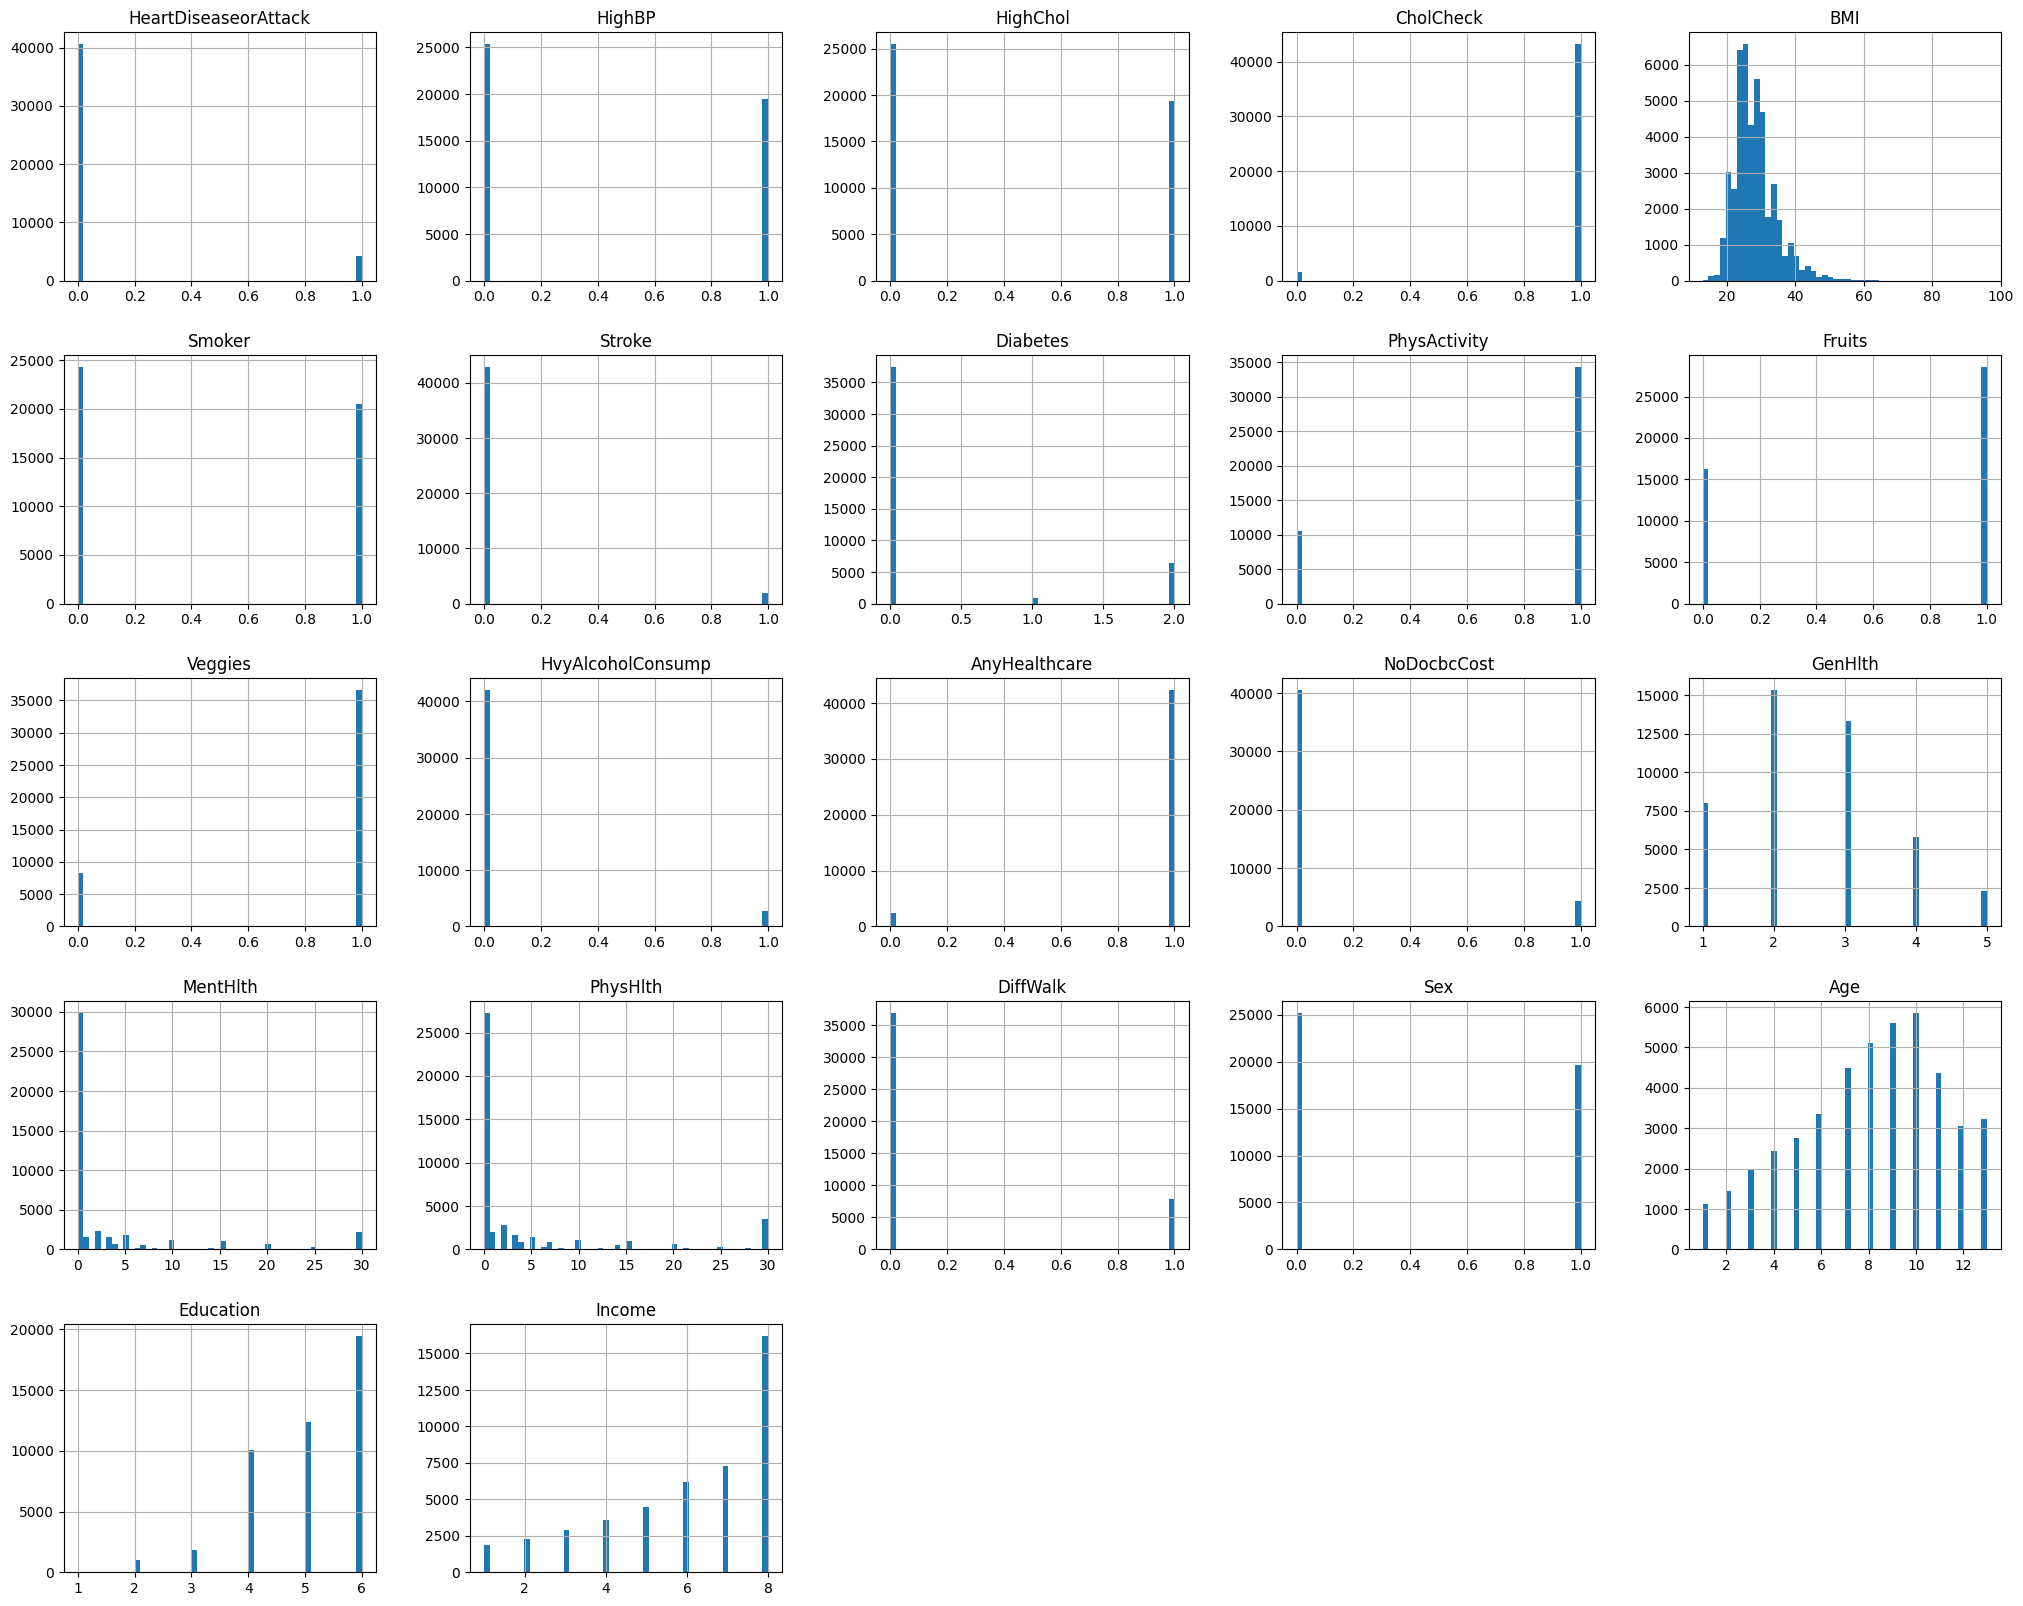

In [ ]:
heart_data.hist(bins=50, figsize=(25, 20))
plt.show()

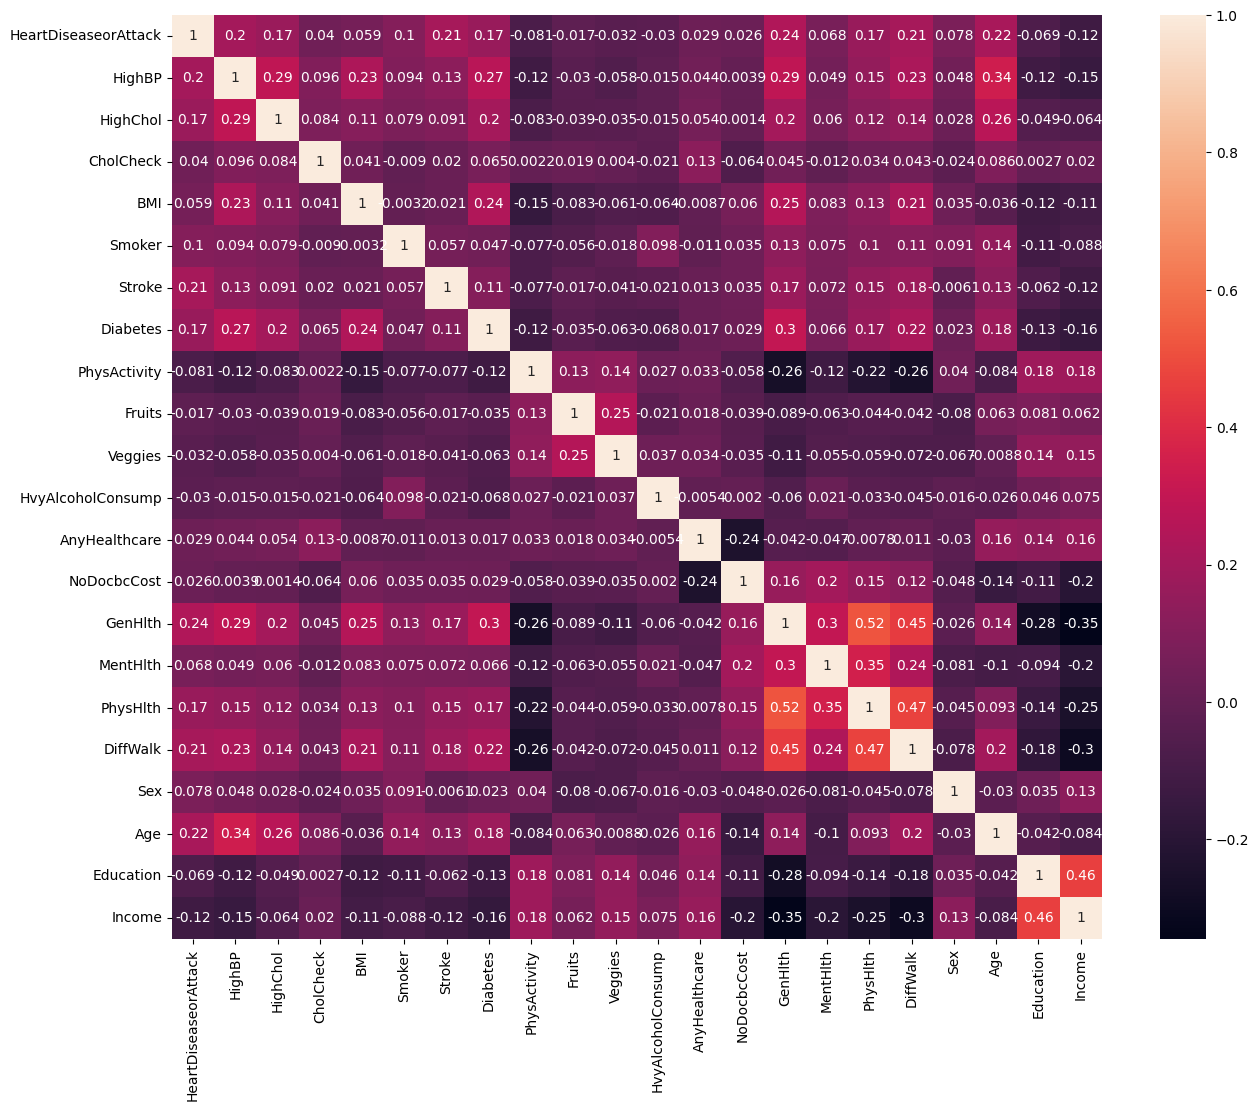

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(heart_data.corr(), annot=True)
plt.show()

In [ ]:
correlation_matrix = heart_data.corr(method='pearson')
correlation_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.204997,0.169806,0.040259,0.058635,0.102138,0.207546,0.165344,-0.080535,-0.016680,...,0.029063,0.025959,0.239251,0.067658,0.169250,0.206691,0.077699,0.215279,-0.068840,-0.120004
HighBP,0.204997,1.000000,0.286505,0.095808,0.230048,0.094215,0.129294,0.269214,-0.115618,-0.030219,...,0.043878,0.003853,0.288678,0.048690,0.153255,0.226136,0.047587,0.339737,-0.115587,-0.145348
HighChol,0.169806,0.286505,1.000000,0.084219,0.108060,0.078724,0.090769,0.204029,-0.082617,-0.038603,...,0.054239,0.001356,0.201574,0.059559,0.118329,0.144732,0.027595,0.264201,-0.048517,-0.063673
CholCheck,0.040259,0.095808,0.084219,1.000000,0.041047,-0.009017,0.020047,0.064982,0.002216,0.019173,...,0.125226,-0.063762,0.044633,-0.012274,0.033894,0.042699,-0.023905,0.085529,0.002696,0.019588
BMI,0.058635,0.230048,0.108060,0.041047,1.000000,-0.003249,0.020638,0.238130,-0.153010,-0.083095,...,-0.008734,0.060306,0.249628,0.083156,0.126331,0.213127,0.035132,-0.036079,-0.119782,-0.106066
Smoker,0.102138,0.094215,0.078724,-0.009017,-0.003249,1.000000,0.057377,0.046731,-0.077211,-0.055651,...,-0.010615,0.035157,0.133162,0.074968,0.101249,0.107456,0.090876,0.143542,-0.112153,-0.087874
Stroke,0.207546,0.129294,0.090769,0.020047,0.020638,0.057377,1.000000,0.105372,-0.076913,-0.016832,...,0.013474,0.035490,0.172722,0.071609,0.149796,0.178236,-0.006130,0.126086,-0.062159,-0.121302
Diabetes,0.165344,0.269214,0.204029,0.064982,0.238130,0.046731,0.105372,1.000000,-0.120692,-0.034768,...,0.017116,0.029143,0.296619,0.066110,0.168274,0.221883,0.022670,0.179161,-0.129881,-0.159667
PhysActivity,-0.080535,-0.115618,-0.082617,0.002216,-0.153010,-0.077211,-0.076913,-0.120692,1.000000,0.130736,...,0.032603,-0.057554,-0.264031,-0.119646,-0.219309,-0.264155,0.040197,-0.083658,0.183465,0.182868
Fruits,-0.016680,-0.030219,-0.038603,0.019173,-0.083095,-0.055651,-0.016832,-0.034768,0.130736,1.000000,...,0.018159,-0.038670,-0.088797,-0.062512,-0.044359,-0.041845,-0.079782,0.063283,0.080723,0.061736


In [ ]:
#checking the distribution of target variable
heart_data['Income'].value_counts()

8.0    16219
7.0     7295
6.0     6201
5.0     4474
4.0     3582
3.0     2927
2.0     2269
1.0     1860
Name: Income, dtype: int64

In [ ]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 12.4 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=c7ad0434460c3c04791d5f421f55aa46a9fe8472bab066de0f409e52a41cb930
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [ ]:
from featurewiz import featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [ ]:
target = 'Income'
features= featurewiz(heart_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (44828, 22)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
##################################

In [ ]:
x = heart_data.drop(columns='Income', axis=1)
y = heart_data['Income']

In [ ]:
print(x)

       HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                       0.0     1.0       1.0        1.0  40.0     1.0   
1                       0.0     0.0       0.0        0.0  25.0     1.0   
2                       0.0     1.0       1.0        1.0  28.0     0.0   
3                       0.0     1.0       0.0        1.0  27.0     0.0   
4                       0.0     1.0       1.0        1.0  24.0     0.0   
...                     ...     ...       ...        ...   ...     ...   
46777                   0.0     0.0       0.0        1.0  19.0     0.0   
46778                   0.0     0.0       0.0        1.0  21.0     0.0   
46779                   0.0     0.0       0.0        0.0  31.0     0.0   
46780                   0.0     0.0       0.0        1.0  21.0     0.0   
46782                   0.0     1.0       1.0        1.0  31.0     1.0   

       Stroke  Diabetes  PhysActivity  Fruits  ...  HvyAlcoholConsump  \
0         0.0       0.0           0.0 

In [ ]:
print(y)

0        3.0
1        1.0
2        8.0
3        6.0
4        4.0
        ... 
46777    7.0
46778    8.0
46779    2.0
46780    3.0
46782    NaN
Name: Income, Length: 44828, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(44828, 21) (35862, 21) (8966, 21)


In [ ]:
#Random forest
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=", metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=", metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: ignored